In [182]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
pd.options.display.max_columns = 33

In [62]:
df = pd.read_csv('breast_cancer.csv')
del df['Unnamed: 32']

In [63]:
labels = df.diagnosis
del df['diagnosis']
ids = df.id
del df['id']
y, uniques = pd.factorize(labels)

B    357
M    212
Name: diagnosis, dtype: int64


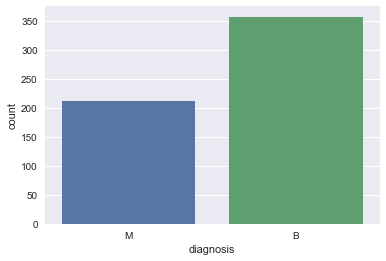

In [64]:
# counting class sizes
ax = sns.countplot(labels, label="Count")
print(labels.value_counts())

The classes are not extremely unbalanced so we will not be using any over sampling or undersampling to balance the classes.


In [65]:
from sklearn.decomposition import PCA

X = df.reset_index(drop=True)
pca = PCA(n_components=30)
pca.fit(X)
print(pca.explained_variance_ratio_)
X_r = pca.fit(X).transform(X)

[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=30)
X_r2 = lda.fit(X, labels).transform(X)

Text(0.5,1,'PCA')

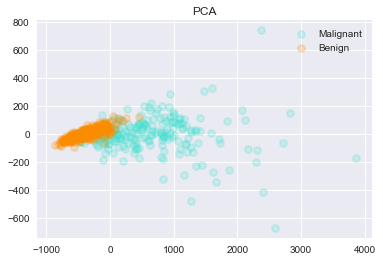

In [92]:
plt.figure()
colors = ['turquoise', 'darkorange']
target_names = ['Malignant', 'Benign']
lw = 2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.2, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

There seems to be a some overlap between the benign and the malignant datapoints. But the benign points are so tightly colocated, it is hard to say. The points are still separable still and work really well with PCA. Approximately 98% of the variance was captured in the first

# Visualization
## Violin plots
Violin plots are great for visualizing floating point data. Violin plots are box and whisker plots, but with the density function plotted instead of the box. Centering data helps ko keep the plot 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

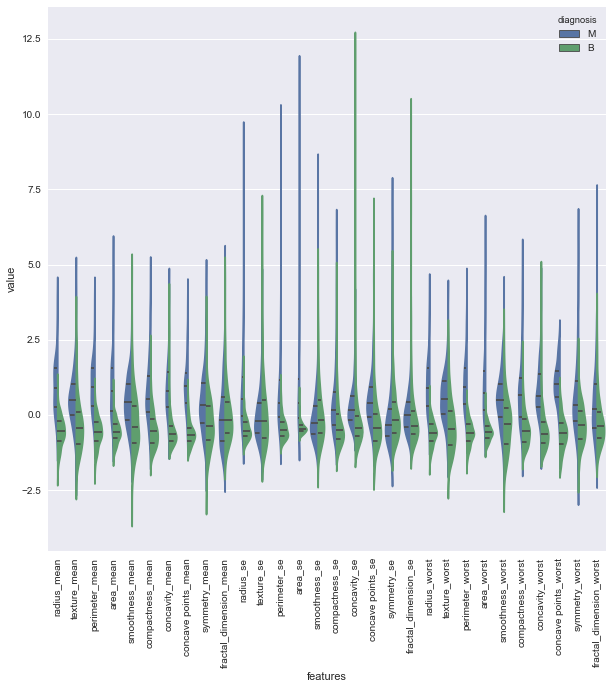

In [89]:
data = X
data = (data - data.mean()) / (data.std())              
data = pd.concat([labels,data.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

# comparing any two features for correlation
this is a good tool to have in case we wish to check the correlation between any two features. If pairs of features have a high correlation, we can drop one of them.

/Users/agrimabahl/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


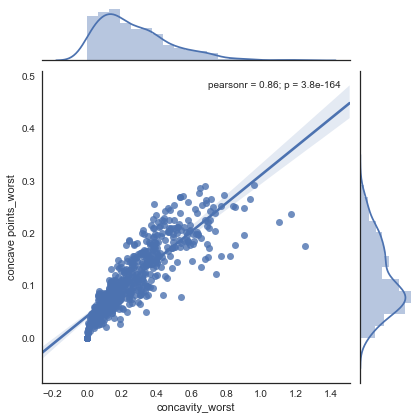

In [97]:
sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'], kind="regg")

/Users/agrimabahl/anaconda/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


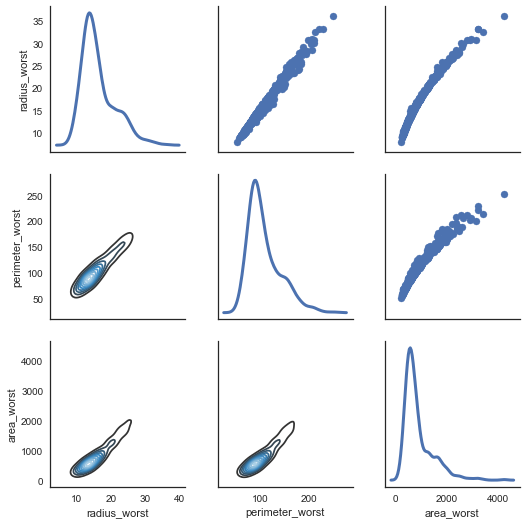

In [96]:
local = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(local, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

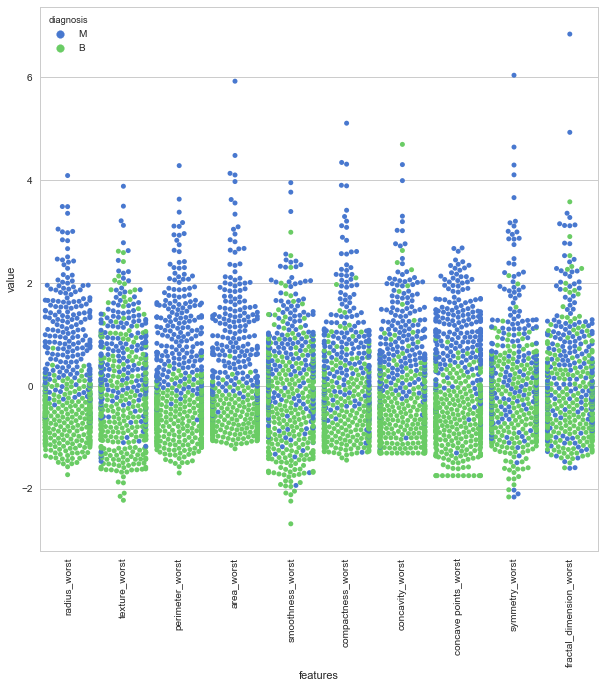

In [112]:
# Swarm plot

data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([labels,data_n_2.iloc[:,20:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

# correlation between all features

we will use a heatmap to visualize this and to make sure that pairs of features with high covariance jump out at us.

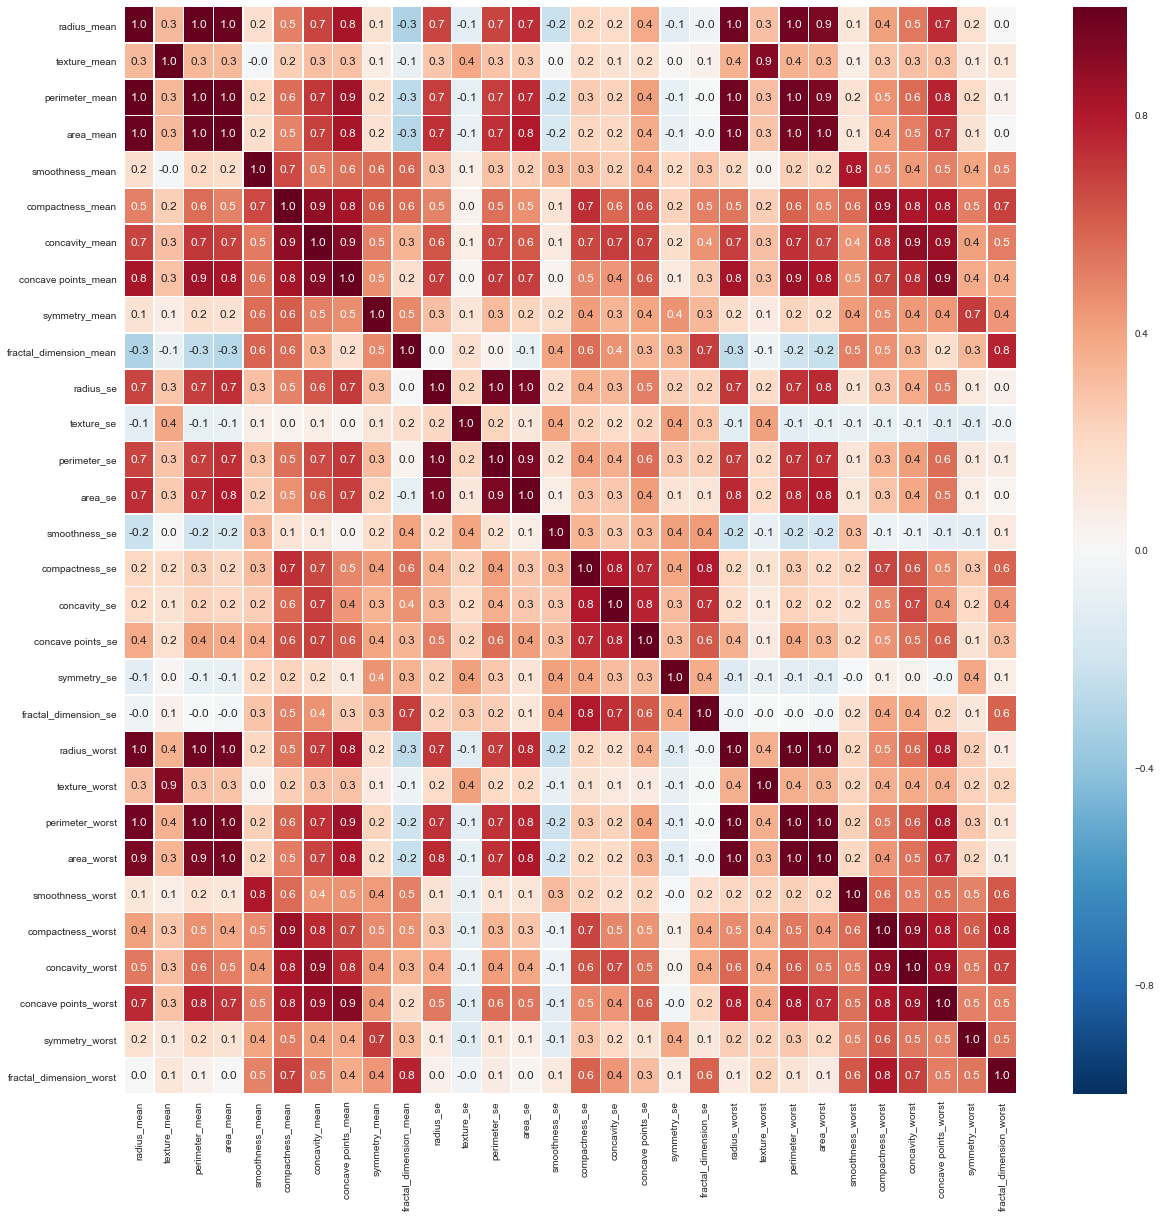

In [110]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f')

# Manual feature selection using the correlation heat map.
This step can be automated if we are selecting ANY of the clusters of features which have high pairwise covariance. In this case I am doing this manually. The next post will have a technique to automate this.

Selections: 
**area_mean**, **perimeter_mean** and **radius_mean** all have a covariance of 1. Their covariances with the other features are almost exactly the same too, so that can not be used as a criterion to select one. Since the swarm plot of area_mean looks more well separated than the other two, we select **area_mean** and drop the other two.

**perimeter_worst**, **radius_worst** and **area_worst** have a covariance of 1. Again, I am keeping **area_worst** based on the swarm plots.

between **perimeter_se**, **radius_se** and **area_se**, I am selecting **area_se**

**concavity_mean**, **compactness_mean** and **concavepoints_mean** have high pairwise covariance. I am selecting **concavity_mean.**

**concavity_worst**, **compactness_worst** and **concavepoints_worst** have high pairwise covariance. I am selecting **concativy_worst**

Between **concavity_se**, **compactness_se** and **concavepoints_se** have high pairwise covariance. I am selecting **concativy_se**

Between **texture_worst** and **texture_mean**, I am selecting **texture_mean**
Between **area_worst** and **area_mean**, I am selecting **area_mean**

In [137]:
dropping = ['perimeter_mean', 'radius_mean',
            'perimeter_se', 'radius_se',
            'perimeter_worst', 'radius_worst',
            'compactness_mean', 'concave points_mean',
            'compactness_se', 'concave points_se',
            'compactness_worst', 'concave points_worst',
            'texture_worst', 
            'area_worst'
            ]
x = X.drop(dropping, axis=1)

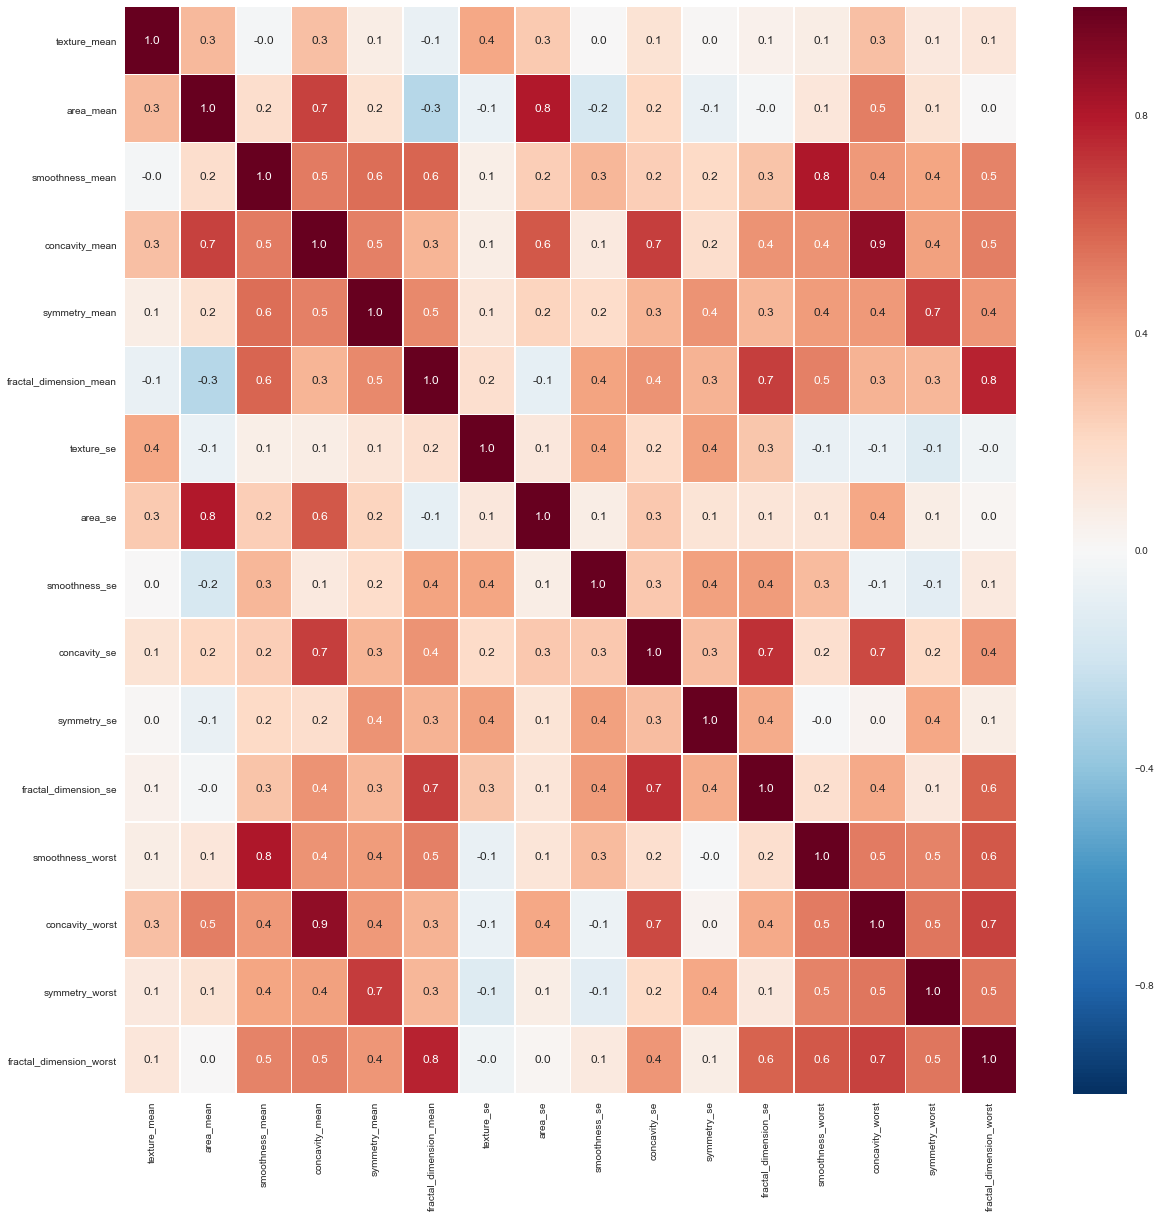

In [138]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f')

Accuracy:  0.9790209790209791


/Users/agrimabahl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


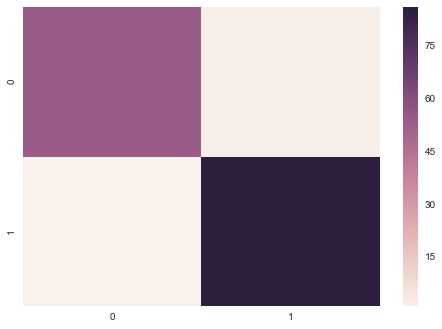

In [170]:
# testing if our feature set is good enough.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y = pd.DataFrame(y, columns=['label'])
x_train, x_test, y_train, y_test = train_test_split(x, y)

clf = RandomForestClassifier(random_state=9)
clf = clf.fit(x_train, y_train)
preds = clf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, preds))
sns.heatmap(confusion_matrix(y_test, preds))

Manual feature selection works really well and gives an accuracy of ~98%. Let us see if other feature selection methods work out better.

## SelectKBest
Next we used a library method to see how it stacks up against the covariance method. We are using scikit-learn's SelectKBest. K is a hyperparameter and can be adjusted to get the best accuracy.

In [156]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = SelectKBest(chi2, k=10).fit(x_train, y_train)
print(features.scores_)
print(x_train.columns)

[6.90078625e+01 3.63845553e+04 1.07649337e-01 1.47884403e+01
 1.93558670e-01 2.99038438e-04 6.29538355e-03 6.78738709e+03
 8.96024741e-04 1.00423235e+00 1.39088325e-04 1.25230811e-02
 3.09497771e-01 2.99873420e+01 8.76817526e-01 2.03828312e-01]
Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy:  0.972027972027972


/Users/agrimabahl/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):
/Users/agrimabahl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


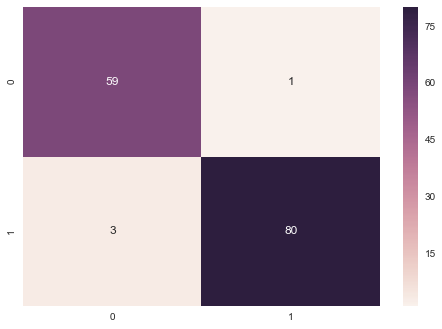

In [157]:
x_train_sel = features.transform(x_train)
x_test_sel = features.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf = RandomForestClassifier()      
clf = clf.fit(x_train_sel,y_train)

ac_2 = accuracy_score(y_test,clf.predict(x_test_sel))
print('Accuracy: ',ac_2)
cm_2 = confusion_matrix(y_test,clf.predict(x_test_sel))
sns.heatmap(cm_2,annot=True,fmt="d")

k=10 works really well in our case. Accuracy is 97%

# Recursive Feature Elimination

Next, we try another scikit-learn in-built feature selection method called Recursive Feature Elimination or RFE. This methods makes the use of feature weights. We use a Random forest here (but any classification method can replace this) and it recursively goes in and eliminates features with the smallest weights, as long as the accuracy is increasing by eliminating those features. n_features_to_select is a hyperparameter here, the number of final features that we specify.    

In [164]:
from sklearn.feature_selection import RFE

clf = RandomForestClassifier()
rfe = RFE(estimator=clf, n_features_to_select=15, step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())

In [165]:
print('Chosen best feature by rfe:',x_train.columns[rfe.support_])

Chosen best feature by rfe: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy:  0.958041958041958


/Users/agrimabahl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


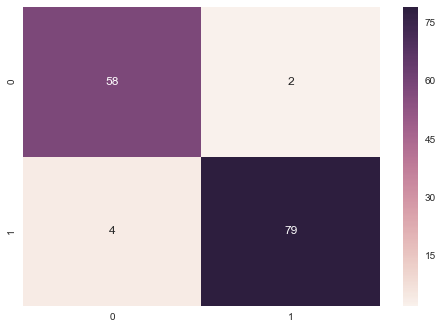

In [167]:
x_train_sel = x_train[x_train.columns[rfe.support_]]
x_test_sel = x_test[x_train.columns[rfe.support_]]
#random forest classifier with n_estimators=10 (default)
clf = RandomForestClassifier()      
clf = clf.fit(x_train_sel,y_train)

ac_2 = accuracy_score(y_test,clf.predict(x_test_sel))
print('Accuracy: ',ac_2)
cm_2 = confusion_matrix(y_test,clf.predict(x_test_sel))
sns.heatmap(cm_2,annot=True,fmt="d")

The 15 features are exactly the same as the ones selected by SelectKBest

# Recursive Feature Elimination with Cross Validation (RFECV)

This method returns the optimal number of features to select, so we don't need to tune the n_features hyperparameter. 

In [171]:
from sklearn.feature_selection import RFECV

clf = RandomForestClassifier()
rfe_cv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfe_cv = rfe_cv.fit(x_train, y_train)

print('Optimal number of features :', rfe_cv.n_features_)
print('Best features :', x_train.columns[rfe_cv.support_])

/Users/agrimabahl/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal number of features : 15
Best features : Index(['texture_mean', 'area_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


/Users/agrimabahl/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


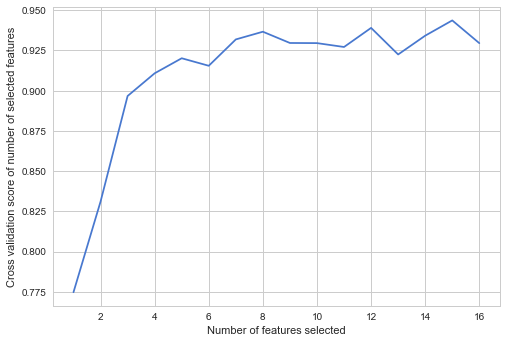

In [174]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Size of feature subset")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfe_cv.grid_scores_) + 1), rfe_cv.grid_scores_)
plt.show()

## Next, we use the feature_importances  returned by the scikit-learn Random Forests classifier.

/Users/agrimabahl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


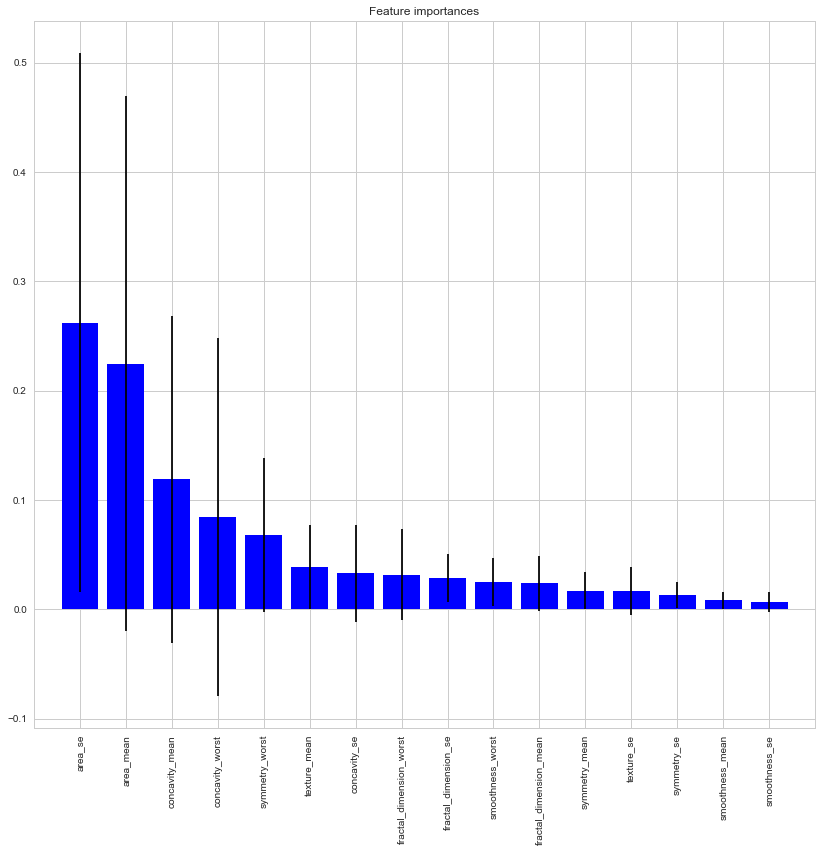

In [188]:
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()